In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import requests
import os
from matplotlib import cycler #Modificación de los valores estándar del aspecto de las gráficas.
from mpl_toolkits import mplot3d #Librería para gráficas 3D.
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [66]:
path = '/home/mimimustaine/Downloads/Análisis_de_datos/da2019-MIMIMUSTAINE/Semana2/Tarea/'
Tmax_2018 = pd.read_csv(path + '201801010000TMax.csv', encoding = 'latin-1')
Tmax_2019 = pd.read_csv(path + '201901010000TMax.csv', encoding = 'latin-1')
Tmed_2018 = pd.read_csv(path + '201801010000TMed.csv', encoding = 'latin-1')
Tmed_2019 = pd.read_csv(path + '201901010000TMed.csv', encoding = 'latin-1')
Tmin_2018 = pd.read_csv(path + '201801010000TMin.csv', encoding = 'latin-1')
Tmin_2019 = pd.read_csv(path + '201901010000TMin.csv', encoding = 'latin-1')
Lluv_2018 = pd.read_csv(path + '201801010000Lluv.csv', encoding = 'latin-1')
Lluv_2019 = pd.read_csv(path + '201901010000Lluv.csv', encoding = 'latin-1')

In [10]:
print(Tmax_2019.keys())
#Tienen los mismos nombres de columnas, por lo que es posible compararlos.
print(Tmax_2019.keys() == Tmax_2018.keys(), Tmed_2019.keys() == Tmed_2018.keys(), 
      Tmin_2019.keys() == Tmin_2018.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')
[ True  True  True  True  True  True] [ True  True  True  True  True  True] [ True  True  True  True  True  True]


## <strong>Distribución de temperaturas:</strong>

#### <strong>Promedio, desviaciones estándar, media, moda de la distribución, rango interquartil de la distribución.</strong>

Promedio de la temperatura máxima, media y mínima para 2018, 2019 respectivamente:

#### 2018:

In [51]:
T2018 = pd.DataFrame({'Año' : [2018, 2018, 2018],
                      'Temperatura' : ['Máxima', 'Media', 'Mínima'],
                      'Media' : [Tmax_2018['Tmax'].mean(), Tmed_2018['Tmed'].mean(), Tmin_2018['Tmin'].mean()],
                      '$\sigma$' : [Tmax_2018['Tmax'].std(), Tmed_2018['Tmed'].std(), Tmin_2018['Tmin'].std()],
                      'Mediana' : [Tmax_2018['Tmax'].median(), Tmed_2018['Tmed'].median(), Tmin_2018['Tmin'].median()],
                      'Moda' : [Tmax_2018['Tmax'].mode(), Tmed_2018['Tmed'].mode(), Tmin_2018['Tmin'].mode()],
                      'Mínima' : [Tmax_2018['Tmax'].min(), Tmed_2018['Tmed'].min(), Tmin_2018['Tmin'].min()],
                      'Máxima' : [Tmax_2018['Tmax'].max(), Tmed_2018['Tmed'].max(), Tmin_2018['Tmin'].max()],
                      '25%' : [Tmax_2018['Tmax'].quantile(.25), Tmed_2018['Tmed'].quantile(.25), Tmin_2018['Tmin'].quantile(.25)],
                      '50%' : [Tmax_2018['Tmax'].quantile(.50), Tmed_2018['Tmed'].quantile(.50), Tmin_2018['Tmin'].quantile(.50)],
                      '75%' : [Tmax_2018['Tmax'].quantile(.75), Tmed_2018['Tmed'].quantile(.75), Tmin_2018['Tmin'].quantile(.75)]})
T2018

,Año,Temperatura,Media,$\sigma$,Mediana,Moda,Mínima,Máxima,25%,50%,75%
0,2018,Máxima,24.383076,4.606409,24.0,0 24.1 dtype: float64,6.6,36.3,21.00,24.0,27.50
1,2018,Media,16.379527,4.960928,15.8,0 12.6 dtype: float64,3.2,28.5,12.55,15.8,20.60
2,2018,Mínima,8.372247,6.170696,7.5,0 4.8 1 5.4 2 5.6 3 7.2 dtype: flo...,-10.6,23.3,3.85,7.5,12.75


#### 2019:

In [52]:
T2019 = pd.DataFrame({'Año' : [2019, 2019, 2019],
                      'Temperatura' : ['Máxima', 'Media', 'Mínima'],
                      'Media' : [Tmax_2019['Tmax'].mean(), Tmed_2019['Tmed'].mean(), Tmin_2019['Tmin'].mean()],
                      '$\sigma$' : [Tmax_2019['Tmax'].std(), Tmed_2019['Tmed'].std(), Tmin_2019['Tmin'].std()],
                      'Mediana' : [Tmax_2019['Tmax'].median(), Tmed_2019['Tmed'].median(), Tmin_2019['Tmin'].median()],
                      'Moda' : [Tmax_2019['Tmax'].mode(), Tmed_2019['Tmed'].mode(), Tmin_2019['Tmin'].mode()],
                      'Mínima' : [Tmax_2019['Tmax'].min(), Tmed_2019['Tmed'].min(), Tmin_2019['Tmin'].min()],
                      'Máxima' : [Tmax_2019['Tmax'].max(), Tmed_2019['Tmed'].max(), Tmin_2019['Tmin'].max()],
                      '25%' : [Tmax_2019['Tmax'].quantile(.25), Tmed_2019['Tmed'].quantile(.25), Tmin_2019['Tmin'].quantile(.25)],
                      '50%' : [Tmax_2019['Tmax'].quantile(.50), Tmed_2019['Tmed'].quantile(.50), Tmin_2019['Tmin'].quantile(.50)],
                      '75%' : [Tmax_2019['Tmax'].quantile(.75), Tmed_2019['Tmed'].quantile(.75), Tmin_2019['Tmin'].quantile(.75)]})
T2019

,Año,Temperatura,Media,$\sigma$,Mediana,Moda,Mínima,Máxima,25%,50%,75%
0,2019,Máxima,24.992289,4.434152,24.657766,0 22.0 dtype: float64,13.064516,39.870968,21.838710,24.657766,27.931452
1,2019,Media,17.444502,4.738147,16.516129,0 15.387097 1 22.435484 dtype: float64,2.951613,29.800000,13.937570,16.516129,21.467742
2,2019,Mínima,9.812221,5.941190,8.937345,0 7.387097 dtype: float64,-7.161290,22.770968,5.350806,8.937345,15.128017


In [53]:
Union = pd.concat([T2018, T2019])
Union

,Año,Temperatura,Media,$\sigma$,Mediana,Moda,Mínima,Máxima,25%,50%,75%
0,2018,Máxima,24.383076,4.606409,24.000000,0 24.1 dtype: float64,6.600000,36.300000,21.000000,24.000000,27.500000
1,2018,Media,16.379527,4.960928,15.800000,0 12.6 dtype: float64,3.200000,28.500000,12.550000,15.800000,20.600000
2,2018,Mínima,8.372247,6.170696,7.500000,0 4.8 1 5.4 2 5.6 3 7.2 dtype: flo...,-10.600000,23.300000,3.850000,7.500000,12.750000
0,2019,Máxima,24.992289,4.434152,24.657766,0 22.0 dtype: float64,13.064516,39.870968,21.838710,24.657766,27.931452
1,2019,Media,17.444502,4.738147,16.516129,0 15.387097 1 22.435484 dtype: float64,2.951613,29.800000,13.937570,16.516129,21.467742
2,2019,Mínima,9.812221,5.941190,8.937345,0 7.387097 dtype: float64,-7.161290,22.770968,5.350806,8.937345,15.128017


Diferencia entre las temperatura mínima en 2018, 2019, entre la temperatura media en 2018, 2019 y entre la temperatura máxima en 2018, 2019.

In [62]:
Diferencia = pd.DataFrame({'Temperatura' : ['Máxima', 'Media', 'Mínima'],
                           '$\mu_{2018}$ $(°C)$' : T2018['Media'],
                           '$\mu_{2019}$ $(°C)$' : T2019['Media'],
                           '$\delta \mu$ $(°C)$' : T2019['Media'] - T2018['Media']})
Diferencia

,Temperatura,$\mu_{2018}$ $(°C)$,$\mu_{2019}$ $(°C)$,$\delta \mu$ $(°C)$
0,Máxima,24.383076,24.992289,0.609213
1,Media,16.379527,17.444502,1.064975
2,Mínima,8.372247,9.812221,1.439973


## <strong>Distribución de precipitaciones:</strong>

#### <strong>Diferencia de la precipitación media entre 2018 y 2019.</strong>

In [67]:
Lluv_2019['ENE'].mean() - Lluv_2018['ENE'].mean()

-11.386323610676282

Es decir, hubo menores lluvias en 2019 que en 2018.

#### <strong>Estado con mayor precipitación en base a los datos proporcionados</strong>

#### 2019:

In [73]:
Lluv_2019['ENE'].max()

274.7

La mayor precipitación en 2019 fue con 274.7 unidades, el estado con esta cantidad de precipitación es:

In [72]:
Lluv_2019[Lluv_2019['ENE'] == Lluv_2019['ENE'].max()]

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
998,-92.9375,17.566667,TAB,PUYTB,"Puyacatengo, Tab.",274.7


#### 2018:

In [77]:
Lluv_2018['ENE'].max()

818.6

La mayor precipitación en 2019 fue con 818.6 unidades, el estado con esta cantidad de precipitación es:

In [75]:
Lluv_2018[Lluv_2018['ENE'] == Lluv_2018['ENE'].max()]

,LON,LAT,ESTADO,CLAVE_SIH,NOMBRE,ENE
181,-93.383333,17.425,CHIS,SAYCP,Sayula,818.6


#### <strong>Estado con menor precipitación en base a los datos proporcionados</strong>

#### 2019:

In [102]:
cop_2019 = np.asarray(Lluv_2019['ENE'])
minimo = cop_2019[0]
for i in range(len(cop_2019)):
    if((cop_2019[i] <= minimo) & (cop_2019[i] != 0)):
        minimo = cop_2019[i]
minimo

0.01

La menor precipitación en el 2019 fue de 0.01 unidades, el estado con esta cantidad de precipitación es:

In [103]:
Lluv_2019[Lluv_2019['ENE'] == minimo]

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
120,-92.778889,16.401389,CHIS,ANGCP,"Doctor Belisario Domínguez, Chis.",0.01
172,-92.105556,15.775000,CHIS,SDOCP,"Santo Domingo, Chis.",0.01
216,-103.611389,19.248611,COL,BVSCM,"Buena Vista, Col.",0.01
217,-103.723611,18.754722,COL,CDOCM,"Cerro de Ortega, Col.",0.01
218,-103.702778,19.295000,COL,CHNCM,"El Chanal, Col.",0.01
220,-103.757222,19.317500,COL,CMLCM,"Comala, Col.",0.01
221,-103.804167,19.212500,COL,CQMCM,"Coquimatlán, Col.",0.01
224,-103.774167,18.809167,COL,LDACM,"Laguna de Amela, Col.",0.01
232,-103.882778,18.925556,COL,TCMCM,"Tecomán, Col.",0.01
233,-103.396667,18.967222,COL,TRJCM,"Solidaridad, Col.",0.01


#### 2018:

In [100]:
cop_2018 = np.asarray(Lluv_2018['ENE'])
minimo = cop_2018[0]
for i in range(len(cop_2018)):
    if((cop_2018[i] <= minimo) & (cop_2018[i] != 0)):
        minimo = cop_2018[i]
minimo

0.1

La menor precipitación en el 2019 fue de 0.1 unidades, el estado con esta cantidad de precipitación es:

In [101]:
Lluv_2018[Lluv_2018['ENE'] == minimo]

,LON,LAT,ESTADO,CLAVE_SIH,NOMBRE,ENE
215,-100.929722,25.561111,COAH,ARACL,"Ramos Arizpe Aeropuerto, Coah.",0.1
236,-101.016667,25.376389,COAH,STOCL,"Saltillo, Coah.",0.1
237,-103.450000,25.541667,COAH,TORCL,"Torreón observatorio, Coah.",0.1
446,-100.496111,21.220000,GTO,POZGJ,"Pozos, Gto.",0.1
763,-96.933333,17.516667,OAX,SNAOX,"Santiago Nacaltepec, Oax.",0.1
839,-100.269444,20.704167,QRO,AMZQT,"Amazcala, Qro. SGT*",0.1
898,-106.250000,23.350000,SIN,SQRSI,"Siqueros, Sin.",0.1
1257,-107.925556,25.870833,SIN,BACURATOCFE,Sinaloa,0.1
1546,-102.114444,18.816667,MICH,LASCRUCESCFE,La Huacana,0.1
1815,-109.400000,27.133333,SON,TESIA,Navojoa,0.1


#### <strong> ¿Cuánto influye la longitud o la latitud de cada estado en la medida de la precipitación?</strong>

Para visualizar las zonas en las que hubo mayor precipitación, es conveniente realizar un mapa como en el ejemplo de Pandas, realizado también en la tarea de la semana 2.

En este es posible visualizar en qué regiones del país existe mayor número de precipitaciones, los mapas sirven para comparar el número de precipitaciones que hubo en el 2018, 2019. En ambos casos el número de precipitaciones es mayor en el sur del país. 

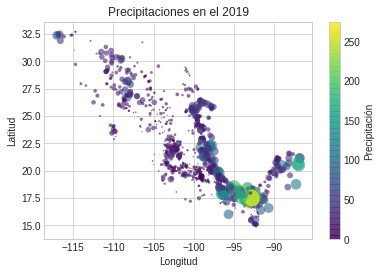

In [113]:
plt.scatter(Lluv_2019['LON'], Lluv_2019['LAT'], label = None, c = Lluv_2019['ENE'], cmap = 'viridis',
            s = Lluv_2019['ENE'], linewidth = 0, alpha = 0.6)
plt.axis(aspect = 'equal')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Precipitación');
plt.title('Precipitaciones en el 2019')
plt.show()

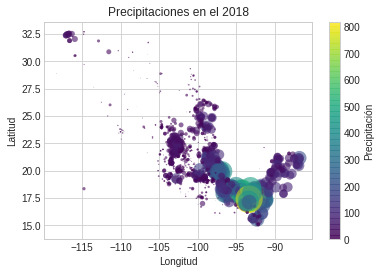

In [114]:
plt.scatter(Lluv_2018['LON'], Lluv_2018['LAT'], label = None, c = Lluv_2018['ENE'], cmap = 'viridis',
            s = Lluv_2018['ENE'], linewidth = 0, alpha = 0.6)
plt.axis(aspect = 'equal')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Precipitación');
plt.title('Precipitaciones en el 2018')
plt.show()

<strong>Nota.</strong> En el análisis de las precipitaciones hubo lugares en el que la precipitación fue cero por lo que no se consideraron puesto que no se tiene seguridad de si en ese lugar hubo toma de datos. Por tanto, se cambia la elección de la elección como precipitación mínima por año.